## Importing Libraries

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions # For plotting decision boundries of multiclass

# **Decision Boundry**
- Binary Class

In [21]:
data = load_iris(as_frame=True)
data.data['target'] = data.target
df = data.data

X = df[['petal width (cm)']].values
y = data.target_names[data.target] == 'virginica' # This is not filtering, This is conditional

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
model = LogisticRegression(random_state=42)
model.fit(X, y)
print(model.coef_, model.intercept_)

LogisticRegression(random_state=42)

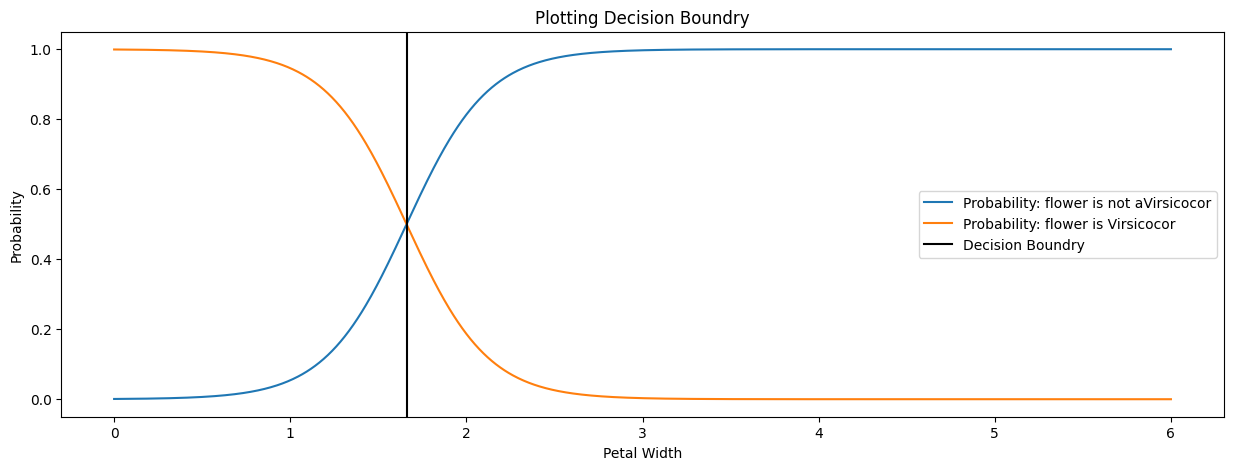

In [29]:
X_new = np.linspace(0, 6, 1000)
y_prob = model.predict_proba(X_new.reshape(-1, 1))

decision_boundry = X_new[y_prob[:, 1] >= 0.5][0]

plt.figure(figsize=(15, 5))
plt.plot(X_new, y_prob[:, 1], label = "Probability: flower is not aVirsicocor")
plt.plot(X_new, y_prob[:, 0], label = "Probability: flower is Virsicocor")
plt.axvline(decision_boundry, color = 'black', label = "Decision Boundry")
plt.plot([decision_boundry], [1])

plt.legend()
plt.title('Plotting Decision Boundry')
plt.xlabel("Petal Width")
plt.ylabel("Probability")
plt.show()

# **Softmax Regression**
Softmax regression is an extension of logistic regression for multi-class classification problems. Given a set of input features x and corresponding labels y (one-hot encoded vectors), the goal is to learn a predictor function that maps x to a probability distribution over the classes.

- The softmax function is used to compute the probabilities:
p_k = exp(z_k) / sum(exp(z_j))

- Cost Function:
The cost function for softmax regression is the cross-entropy loss:
L = - sum(y_k * log(p_k))

- Derivative:
The derivative of the cost function with respect to the logit z_k is:
∂L/∂z_k = p_k - y_k

This derivative represents the difference between the predicted probability and the true probability, which is used to update the model parameters during training.

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train Test Split

In [48]:
X = df.iloc[:, 2:4]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
- multi_class='multinomial'

In [55]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
print(model.coef_, model.intercept_, sep='\n') # 3 intercept and 6 weights

[[-2.59524071 -1.09048831]
 [ 0.0739952  -0.74732063]
 [ 2.52124551  1.83780894]]
[ 10.39369743   2.91401203 -13.30770947]


## Model Prediction and r2-score

In [58]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

## Plotting Decision Boundary

c:\Users\shrir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


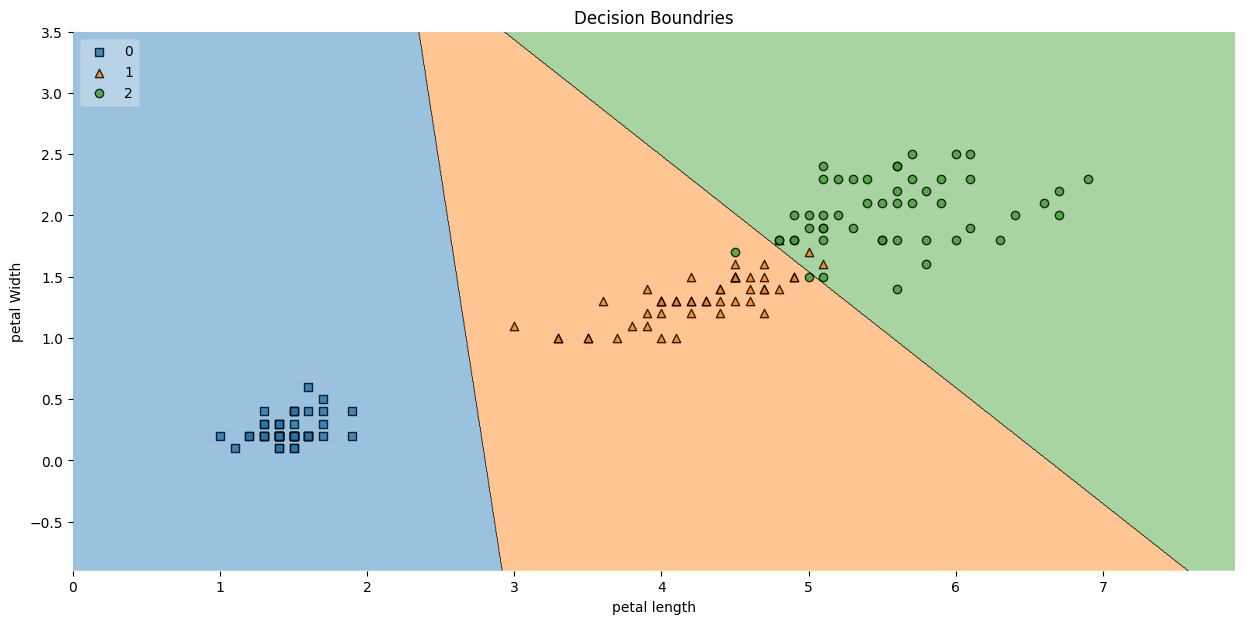

In [61]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()